In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

In [2]:
data = load_dataset('dataBase/train.csv')
#test = load_dataset('dataBase/test.csv')

print("Dimensionalitat del conjunt del dataset:", data.shape)
#print("Dimensionalitat del conjunt test:", test.shape)

Dimensionalitat del conjunt del dataset: (103904, 25)


In [3]:
print("Dades nules en el train:", data.isnull().sum())


Dades nules en el train: Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes        

Veiem que la unica variable de la nostre base de dades que conté elements sense valor és l'atribut Arrival Delay in Minutes tant en el train com en el test.

A partir d'ara treballarem amb el conjunt de train per fer la visualització de les dades.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
Unnamed: 0                           103904 non-null int64
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64


In [7]:
print("Mostra de les primeres 5 entrades de la BBDD")
data.head()

Mostra de les primeres 5 entrades de la BBDD


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
data = load_dataset('dataBase/train.csv')

data.dropna()
data = data.drop(['Unnamed: 0'],axis=1)

data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'Loyal Customer': 0, 'disloyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco Plus': 0, 'Eco':1, 'Business': 2}, inplace = True)
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace = True)

data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,0,13,0,0,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,1,25,1,2,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,0,26,1,2,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,0,25,1,2,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,0,61,1,2,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


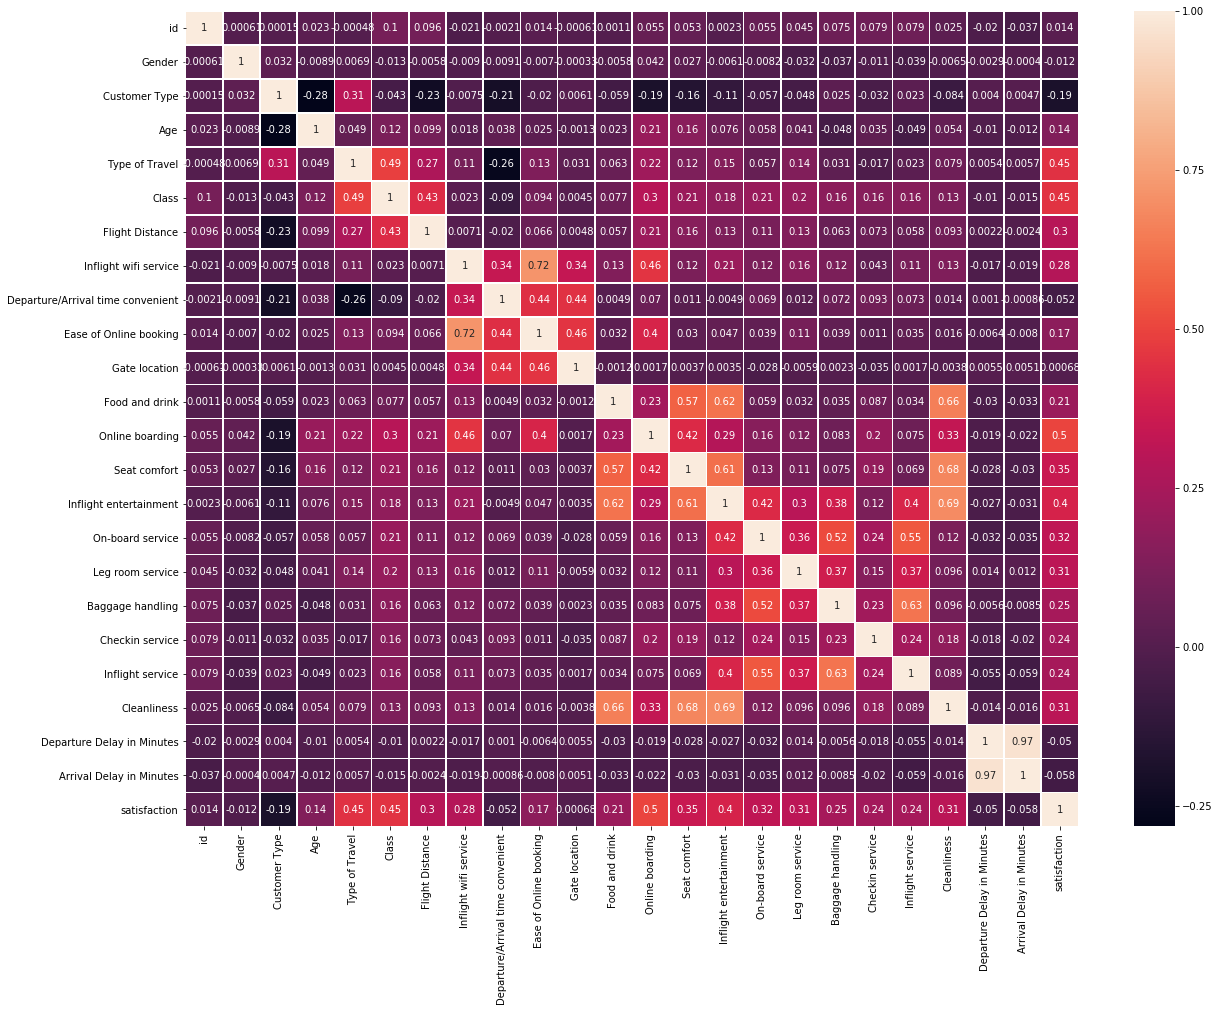

In [9]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = data.corr()

plt.figure(figsize=(20,15))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [10]:
data['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [11]:
#Data set sense els atributs amb molt poca correlacio (< 0.1)

data1 = data.drop(["id", "Gender","Customer Type","Departure/Arrival time convenient","Gate location","Departure Delay in Minutes","Arrival Delay in Minutes"],axis=1)
data1.head()

,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,13,0,0,460,3,3,5,3,5,5,4,3,4,4,5,5,0
1,25,1,2,235,3,3,1,3,1,1,1,5,3,1,4,1,0
2,26,1,2,1142,2,2,5,5,5,5,4,3,4,4,4,5,1
3,25,1,2,562,2,5,2,2,2,2,2,5,3,1,4,2,0
4,61,1,2,214,3,3,4,5,5,3,3,4,4,3,3,3,1


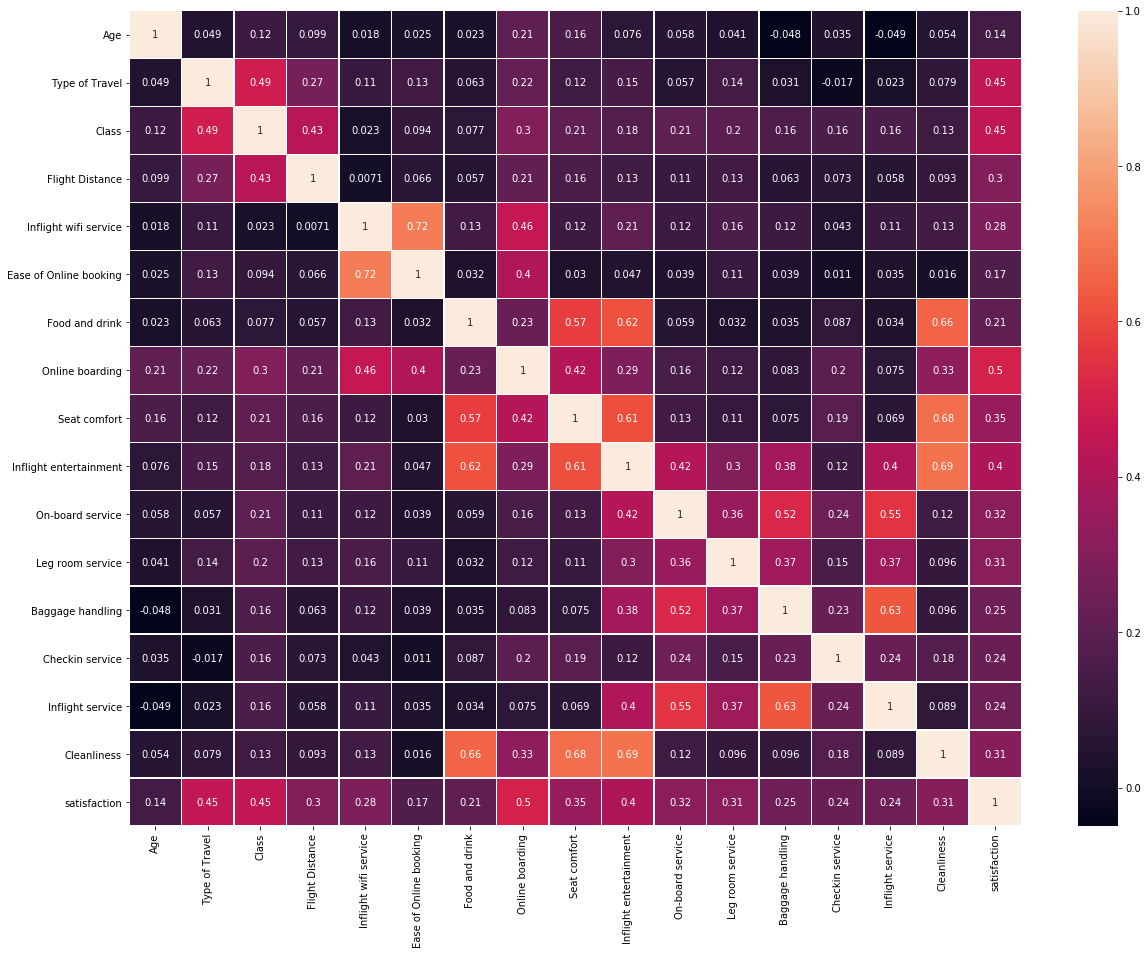

In [12]:
correlacio = data1.corr()

plt.figure(figsize=(20,15))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [ ]:
#Models a impleementar:
    #Regressor logic 
    #SVM
    #MLP (Multiple layer perception)
    #Random forest

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import numpy as np

x = data1.drop(["satisfaction"],axis=1).values
y = data1["satisfaction"].values

particio = [0.5,0.7,0.8,0.9]
#particio train i test
for size in particio:
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=size , test_size = 1-size)

    #Configurem el regressor logistic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2')

    #Entrenem el regresssor logistic
    logireg.fit(x_train, y_train)

    #Resultats test
    print("Classificació correcta sobre el test Logistic",logireg.score(x_test, y_test), " amb el ", size, " de train")


Classificació correcta sobre el test Logistic 0.8593509393286111  amb el  0.5  de train
Classificació correcta sobre el test Logistic 0.8555113563454382  amb el  0.7  de train
Classificació correcta sobre el test Logistic 0.8621336798036668  amb el  0.8  de train
Classificació correcta sobre el test Logistic 0.8548744105475893  amb el  0.9  de train


NameError: name 'classification_report' is not defined